In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance



In [23]:
# Lees de CSV-bestand in (vervang 'data.csv' met de juiste pad naar je bestand)
df = pd.read_csv('cleaned_data.csv', sep=';')

# Verken de data (optioneel)
print(df.head())
print(df.info())

# Selecteer de features (X) en de target variabele (y)
X = df.drop(['HeartDisease', 'CaseNumber', 'LastName', 'PostCode'], axis=1)
y = df['HeartDisease']

# Converteer categorische kolommen naar numeriek (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)


    CaseNumber  LastName  PostCode  Age Sex ChestPainType  RestingBP  \
0  825-37-0603     Stout     82490   46   M           ASY        100   
1  533-80-6803  Gonzalez       696   56   M           NAP        125   
2  161-71-2407     Smith     44762   42   M           ASY        105   
3  598-01-6389  Townsend     21753   38   M           NAP        100   
4  142-50-9256      Ford     74606   56   M           ASY        115   

   Cholesterol  FastingBS  RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  \
0          244          1           1    133              N       26     Flat   
1          244          1           0     98              N       20     Flat   
2          244          1           0    128              Y       15     Down   
3          244          0           0    179              N       11       Up   
4          244          1           1     82              N       10       Up   

   HeartDisease  
0             1  
1             1  
2             1  
3       

In [24]:
# Splits de data in een train- en testset (80% trainen, 20% testen)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Kies het Gradient Boosting model
model = GradientBoostingClassifier()

# Train het model
model.fit(X_train, y_train)


GradientBoostingClassifier()

In [26]:
# Voorspel met de testdata
y_pred = model.predict(X_test)  # Voorspel met de testdata
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Krijg de voorspelde waarschijnlijkheden

# Bereken de evaluatie metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

# Print de evaluatie metrics
print(f"Gradient Boosting - Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}, F1 Score: {f1:.4f}")


Gradient Boosting - Accuracy: 0.8852, ROC AUC: 0.9379, F1 Score: 0.8995


In [27]:
# Maak een DataFrame met de werkelijke en voorspelde waarden
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Predicted Probability': y_pred_proba
})

# Selecteer een willekeurige sample van 20 rijen
random_sample = results_df.sample(n=20, random_state=42)

# Print de willekeurige sample
print(random_sample)


     Actual  Predicted  Predicted Probability
72        0          0               0.018394
218       0          0               0.068335
731       0          0               0.465283
660       1          1               0.640782
518       1          1               0.925123
39        1          1               0.985763
70        0          0               0.052099
755       1          1               0.983260
559       1          1               0.919307
394       0          0               0.057895
136       0          0               0.133382
433       0          0               0.192567
888       1          1               0.825718
408       0          1               0.597403
911       1          1               0.971039
235       0          0               0.205004
578       1          0               0.425077
501       1          1               0.943032
209       0          0               0.032384
467       0          0               0.032025


# Confusion Matrix

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           68           11
Actual 1           10           94


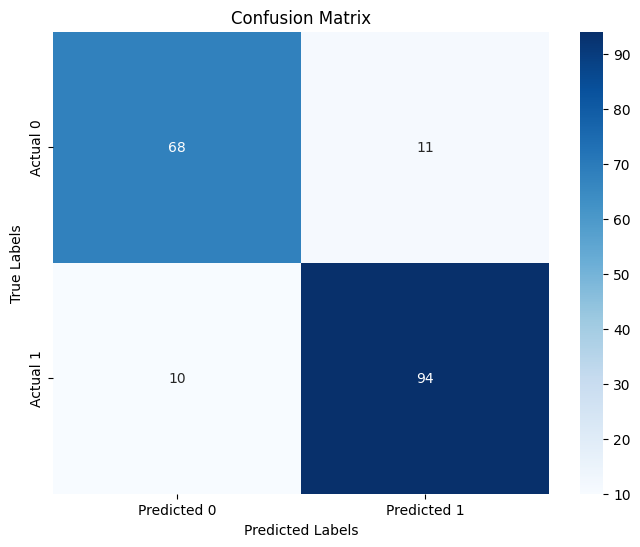

              precision    recall  f1-score   support

           0       0.87      0.86      0.87        79
           1       0.90      0.90      0.90       104

    accuracy                           0.89       183
   macro avg       0.88      0.88      0.88       183
weighted avg       0.89      0.89      0.89       183



In [28]:
# Bereken de confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Zet de confusion matrix om in een DataFrame
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print de confusion matrix
print("Confusion Matrix:")
print(cm_df)

# Visualiseer de confusion matrix met Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# print classification report
print(classification_report(y_test, y_pred))

In [29]:
from sklearn.model_selection import GridSearchCV

# Definieer de hyperparameters en de waarden die je wilt testen
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
}

# Configureer de GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), 
                           param_grid=param_grid, 
                           scoring='roc_auc', 
                           cv=5, 
                           verbose=2)

# Voer de Grid Search uit
grid_search.fit(X_train, y_train)

# Toon de beste hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Train het model met de beste hyperparameters
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth

In [30]:
# Maak voorspellingen met het beste model
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Maak een DataFrame met de werkelijke en voorspelde waarden
results_df_best = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_best,
    'Predicted Probability': y_pred_proba_best
})

# Selecteer een willekeurige sample van 20 rijen
random_sample_best = results_df_best.sample(n=20, random_state=42)

# Print de willekeurige sample
print(random_sample_best)


     Actual  Predicted  Predicted Probability
72        0          0               0.018394
218       0          0               0.068335
731       0          0               0.465283
660       1          1               0.640782
518       1          1               0.925123
39        1          1               0.985763
70        0          0               0.052099
755       1          1               0.983260
559       1          1               0.919307
394       0          0               0.057895
136       0          0               0.133382
433       0          0               0.192567
888       1          1               0.825718
408       0          1               0.597403
911       1          1               0.971039
235       0          0               0.205004
578       1          0               0.425077
501       1          1               0.943032
209       0          0               0.032384
467       0          0               0.032025


# Confusion Matrix

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           69           10
Actual 1           10           94


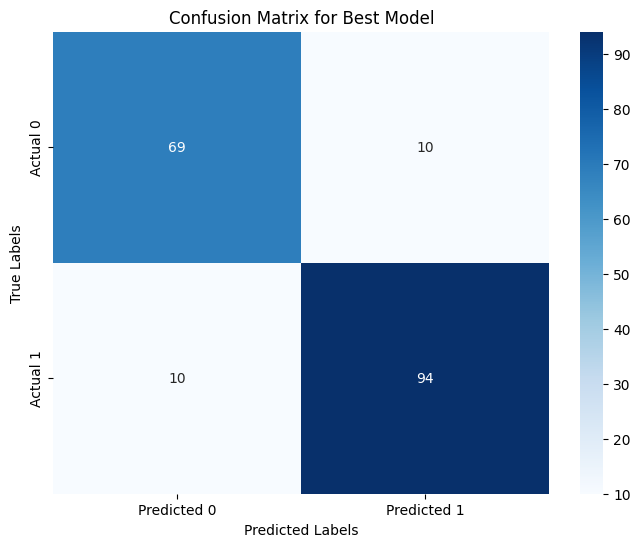

              precision    recall  f1-score   support

           0       0.87      0.86      0.87        79
           1       0.90      0.90      0.90       104

    accuracy                           0.89       183
   macro avg       0.88      0.88      0.88       183
weighted avg       0.89      0.89      0.89       183



In [31]:
# Bereken de confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)

# Zet de confusion matrix om in een DataFrame
cm_df_best = pd.DataFrame(cm_best, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print de confusion matrix
print("Confusion Matrix:")
print(cm_df_best)

# Visualiseer de confusion matrix met Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Best Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# print classification report
print(classification_report(y_test, y_pred))


Permutation Importance:
                   Importance
Oldpeak              0.060109
ST_Slope_Up          0.051002
Sex_M                0.039344
MaxHR                0.022769
ChestPainType_NAP    0.022040
ChestPainType_TA     0.017486
Cholesterol          0.016940
ExerciseAngina_Y     0.015847
ChestPainType_ATA    0.015118
ST_Slope_Flat        0.012568
RestingBP            0.012204
FastingBS            0.010747
RestingECG           0.010565
Age                  0.001457


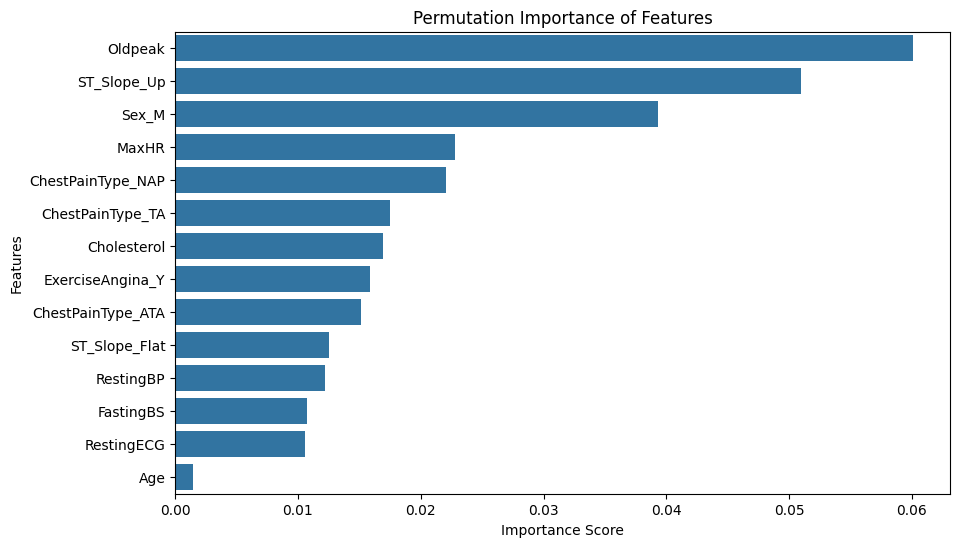

In [32]:
# Stap 9: Permutation Importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=30, random_state=42)

# Zet de resultaten om in een DataFrame
importance_df = pd.DataFrame(result.importances_mean, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Print de permutation importance
print("Permutation Importance:")
print(importance_df)

# Visualiseer de permutation importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df.index)
plt.title('Permutation Importance of Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

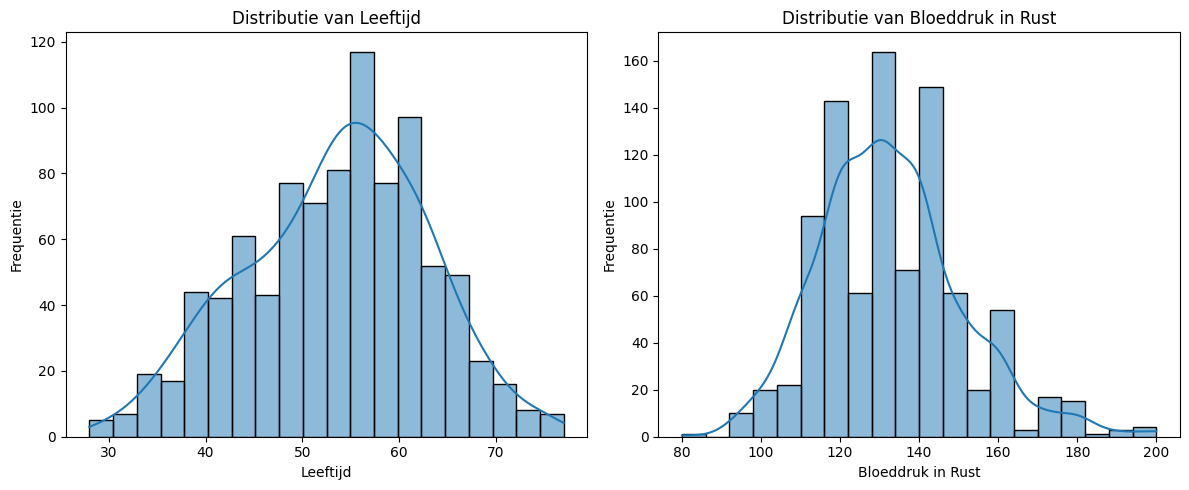

In [33]:
# Visualiseer de distributie van 'Age'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distributie van Leeftijd')
plt.xlabel('Leeftijd')
plt.ylabel('Frequentie')

# Visualiseer de distributie van 'RestingBP'
plt.subplot(1, 2, 2)
sns.histplot(df['RestingBP'], bins=20, kde=True)
plt.title('Distributie van Bloeddruk in Rust')
plt.xlabel('Bloeddruk in Rust')
plt.ylabel('Frequentie')

plt.tight_layout()
plt.show()


# Drempelaanpassing

Classification Report na Drempelaanpassing:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83        79
           1       0.84      0.95      0.89       104

    accuracy                           0.87       183
   macro avg       0.88      0.86      0.86       183
weighted avg       0.88      0.87      0.87       183

Willekeurige Sample van 10 Rijen na Drempelaanpassing:
     Actual  Predicted  Predicted Probability
72        0          0               0.018394
218       0          0               0.068335
731       0          1               0.465283
660       1          1               0.640782
518       1          1               0.925123
39        1          1               0.985763
70        0          0               0.052099
755       1          1               0.983260
559       1          1               0.919307
394       0          0               0.057895
Confusion Matrix na Drempelaanpassing:
          Predicted 0  Predic

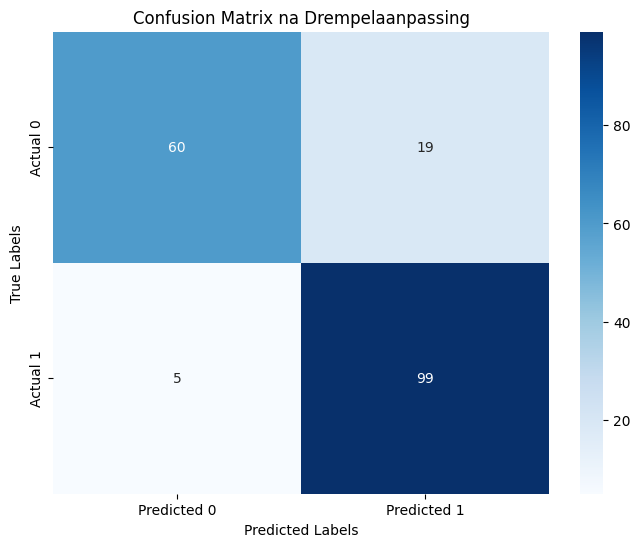

In [34]:
# Voorspellingen maken
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Pas de drempel aan (bijv. naar 0.3)
threshold = 0.3
y_pred_adjusted = (y_pred_proba_best >= threshold).astype(int)

# Evalueer de resultaten met de aangepaste drempel
print("Classification Report na Drempelaanpassing:")
print(classification_report(y_test, y_pred_adjusted))

# Maak een DataFrame met de werkelijke en voorspelde waarden
results_df_adjusted = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_adjusted,
    'Predicted Probability': y_pred_proba_best
})

# Selecteer een willekeurige sample van 10 rijen
random_sample_adjusted = results_df_adjusted.sample(n=10, random_state=42)

# Print de willekeurige sample
print("Willekeurige Sample van 10 Rijen na Drempelaanpassing:")
print(random_sample_adjusted)

# Bereken de confusion matrix
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)

# Zet de confusion matrix om in een DataFrame
cm_df_adjusted = pd.DataFrame(cm_adjusted, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print de confusion matrix voor het aangepaste model
print("Confusion Matrix na Drempelaanpassing:")
print(cm_df_adjusted)

# Visualiseer de confusion matrix voor het aangepaste model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_adjusted, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix na Drempelaanpassing')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
